In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

# Simulate 72 hours (3 days) of data at 5-min intervals
time_hours = np.arange(0, 72, 5/60)

# Circadian cortisol rhythm (24h cycle)
cortisol = 10 + 5*np.sin(2*np.pi*time_hours/24)

# Add random physiological stress spikes
stress_spikes = np.zeros_like(time_hours)
stress_times = np.random.choice(len(time_hours), 6, replace=False)
stress_spikes[stress_times] = np.random.uniform(5, 12, size=6)

cortisol = cortisol + stress_spikes + np.random.normal(0, 0.8, len(time_hours))

# Simulate wearable signals
heart_rate = 65 + 10*np.sin(2*np.pi*time_hours/24 + 0.5) + stress_spikes*2
temperature = 36.5 + 0.3*np.sin(2*np.pi*time_hours/24 - 1)

df = pd.DataFrame({
    "time_hours": time_hours,
    "cortisol": cortisol,
    "heart_rate": heart_rate,
    "temperature": temperature
})

df.head()

,time_hours,cortisol,heart_rate,temperature
0,0.000000,12.463105,69.794255,36.247559
1,0.083333,11.004734,69.984558,36.251155
2,0.166667,10.115763,70.172488,36.254869
3,0.250000,9.562583,70.357957,36.258700
4,0.333333,9.150622,70.540875,36.262646


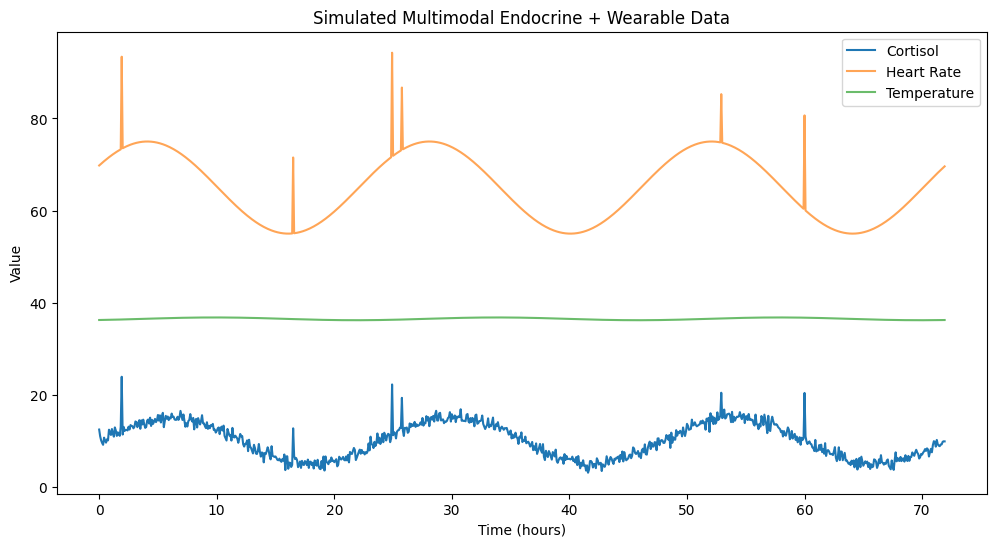

In [2]:
plt.figure(figsize=(12,6))

plt.plot(df["time_hours"], df["cortisol"], label="Cortisol")
plt.plot(df["time_hours"], df["heart_rate"], label="Heart Rate", alpha=0.7)
plt.plot(df["time_hours"], df["temperature"], label="Temperature", alpha=0.7)

plt.xlabel("Time (hours)")
plt.ylabel("Value")
plt.title("Simulated Multimodal Endocrine + Wearable Data")
plt.legend()
plt.show()

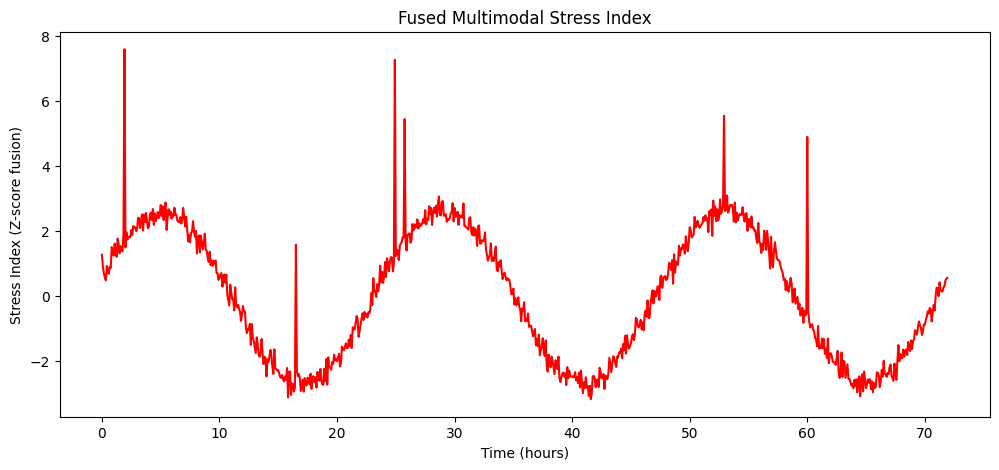

In [4]:
# Simple multimodal fusion score (stress index)

df["stress_index"] = (
    (df["cortisol"] - df["cortisol"].mean()) / df["cortisol"].std() +
    (df["heart_rate"] - df["heart_rate"].mean()) / df["heart_rate"].std()
)

plt.figure(figsize=(12,5))
plt.plot(df["time_hours"], df["stress_index"], color="red")
plt.title("Fused Multimodal Stress Index")
plt.xlabel("Time (hours)")
plt.ylabel("Stress Index (Z-score fusion)")
plt.show()

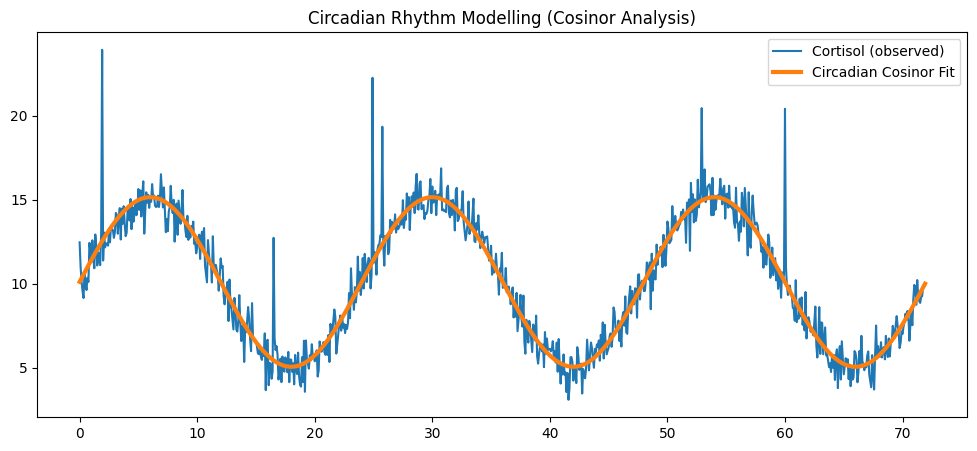

In [7]:
import numpy as np
from scipy.optimize import curve_fit

# Cosinor model
def cosinor(t, M, A, phi):
    return M + A * np.cos((2 * np.pi / 24) * t + phi)

params, _ = curve_fit(cosinor, df["time_hours"], df["cortisol"])

df["cosinor_fit"] = cosinor(df["time_hours"], *params)

plt.figure(figsize=(12,5))
plt.plot(df["time_hours"], df["cortisol"], label="Cortisol (observed)")
plt.plot(df["time_hours"], df["cosinor_fit"], label="Circadian Cosinor Fit", linewidth=3)
plt.legend()
plt.title("Circadian Rhythm Modelling (Cosinor Analysis)")
plt.show()

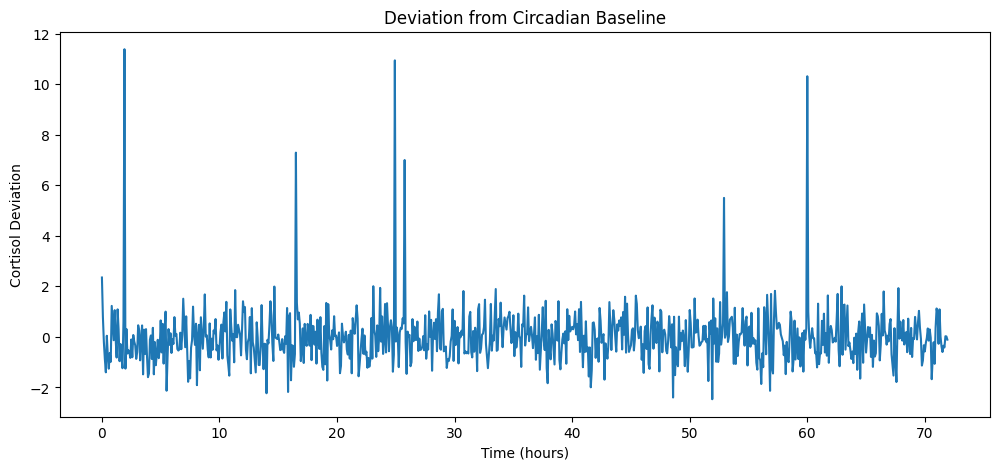

In [8]:
df["rhythm_deviation"] = df["cortisol"] - df["cosinor_fit"]

plt.figure(figsize=(12,5))
plt.plot(df["time_hours"], df["rhythm_deviation"])
plt.title("Deviation from Circadian Baseline")
plt.xlabel("Time (hours)")
plt.ylabel("Cortisol Deviation")
plt.show()

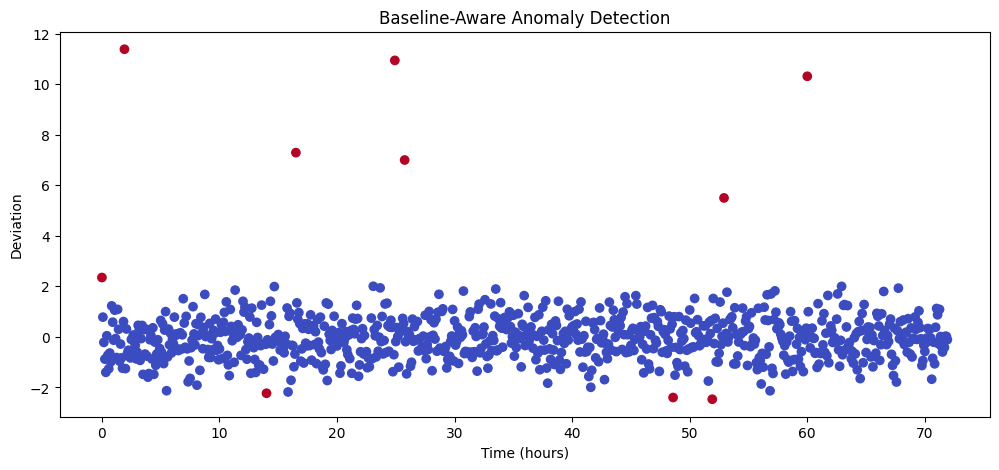

In [9]:
threshold = 2 * df["rhythm_deviation"].std()
df["baseline_anomaly"] = np.abs(df["rhythm_deviation"]) > threshold

plt.figure(figsize=(12,5))
plt.scatter(df["time_hours"], df["rhythm_deviation"],
            c=df["baseline_anomaly"], cmap="coolwarm")
plt.title("Baseline-Aware Anomaly Detection")
plt.xlabel("Time (hours)")
plt.ylabel("Deviation")
plt.show()